In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import xgboost as xgb

from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,VotingClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

In [3]:
data = pd.read_csv("australia.csv")

In [4]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000
mean,13.464770,24.219206,2.130397,5.503135,7.735626,40.877366,15.667228,19.786778,65.874123,49.601985,1017.239505,1014.795580,4.241705,4.326515,18.204961,22.710333,0.220879,0.220259
std,6.416689,6.970676,7.014822,3.696282,3.758153,13.335232,8.317005,8.510180,18.513289,20.197040,6.909357,6.870892,2.797162,2.647251,6.567991,6.836543,0.414843,0.414425
min,-6.700000,4.100000,0.000000,0.000000,0.000000,9.000000,2.000000,2.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-0.700000,3.700000,0.000000,0.000000
25%,8.600000,18.700000,0.000000,2.800000,5.000000,31.000000,9.000000,13.000000,55.000000,35.000000,1012.700000,1010.100000,1.000000,2.000000,13.100000,17.400000,0.000000,0.000000
50%,13.200000,23.900000,0.000000,5.000000,8.600000,39.000000,15.000000,19.000000,67.000000,50.000000,1017.200000,1014.700000,5.000000,5.000000,17.800000,22.400000,0.000000,0.000000
75%,18.400000,29.700000,0.600000,7.400000,10.700000,48.000000,20.000000,26.000000,79.000000,63.000000,1021.800000,1019.400000,7.000000,7.000000,23.300000,27.900000,0.000000,0.000000
max,31.400000,48.100000,206.200000,81.200000,14.500000,124.000000,67.000000,76.000000,100.000000,100.000000,1040.400000,1038.900000,8.000000,9.000000,39.400000,46.100000,1.000000,1.000000


## Balans zmiennej celu

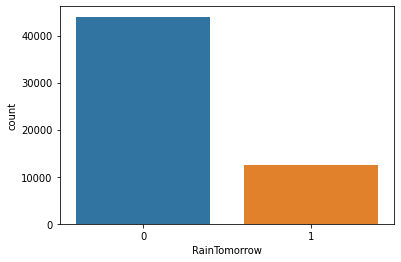

In [5]:
sns.countplot(x = "RainTomorrow", data=data)

Zmienna celu jest dość słabo zbalansowana. Jednakże, jako że ta praca domowa ma na celu sprawdzenie algorytmów na danych jakie były dostarczone, nie będziemy stosować dla zbalansowania np. oversamplingu, za to przy analizie wyników zwrócimy uwagę na miarę f1 rezultatu, aby wziąć pod uwagę przewidywanie mniej licznej klasy.

# Podział zbioru i modele

## Podział zbioru

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data.drop("RainTomorrow", axis=1), 
                                                    data["RainTomorrow"], stratify = data["RainTomorrow"],
                                                    test_size = 0.2)

Za zbiór testowy przyjmujemy losowe 20% rekordów. Dla zbioru testowego będziemy liczyć accuracy i miarę f1. Sprawdzimy też accuracy dla zbioru treningowego, aby upewnić się, że nie mamy przeuczenia. Wyliczymy również wartość pola pod krzywą AUC.  

## RandomForest

In [7]:
clf = RandomForestClassifier(n_estimators=10000, max_depth=2, class_weight="balanced").fit(X_train, y_train)

In [8]:
y_pred = clf.predict(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

In [9]:
print(f"Train accuracy: {round(100 * clf.score(X_train, y_train), 2)}%")
print(f"Test accuracy:  {round(100 * accuracy_score(y_test, y_pred), 2)}%")
print(f"Test f1 score:  {round(100 * f1_score(y_test, y_pred), 2)}%")
print("Area under ROC curve: " + str(round( metrics.auc(fpr, tpr), 2)))

Train accuracy: 75.44%
Test accuracy:  74.72%
Test f1 score:  57.91%
Area under ROC curve: 0.76


## XGboost

In [10]:
clf_2 = xgb.XGBClassifier(booster = "gbtree").fit(X_train, y_train)

In [11]:
y_pred = clf_2.predict(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

In [12]:
print(f"Train accuracy: {round(100 * clf_2.score(X_train, y_train), 2)}%")
print(f"Test accuracy:  {round(100 * accuracy_score(y_test, y_pred), 2)}%")
print(f"Test f1 score:  {round(100 * f1_score(y_test, y_pred), 2)}%")
print("Area under ROC curve: " + str(round( metrics.auc(fpr, tpr), 2)))

Train accuracy: 91.22%
Test accuracy:  85.63%
Test f1 score:  63.17%
Area under ROC curve: 0.75


## Logistic Regresion

In [13]:
clf_3 = LogisticRegression(max_iter=1000, class_weight="balanced").fit(X_train, y_train)

In [14]:
y_pred = clf_3.predict(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

In [15]:
print(f"Train accuracy: {round(100 * clf_3.score(X_train, y_train), 2)}%")
print(f"Test accuracy:  {round(100 * accuracy_score(y_test, y_pred), 2)}%")
print(f"Test f1 score:  {round(100 * f1_score(y_test, y_pred), 2)}%")
print("Area under ROC curve: " + str(round( metrics.auc(fpr, tpr), 2)))

Train accuracy: 80.42%
Test accuracy:  79.53%
Test f1 score:  62.45%
Area under ROC curve: 0.79


# Wnioski
Algorytmy mają zbliżone accuracy dla zbioru treningowego i testowego (największa rożnica przy XGBoost, ale miał on najwyższe accuracy spośród trzech algorytmów), stąd nie mamy tu przeuczenia. Biorąc pod uwagę miarę f1, najlepszym z powyższych modeli był znowu XGBoost, pole pod krzywą AUC było porównywalne we wszystkich przypadkach (0.75-0.79). Podsumowując, najlepszym algorytmem klasyfikacyjnym dla danego zbioru danych okazał się XGBoost.